<a href="https://colab.research.google.com/github/Diego875621/Data_Science/blob/main/Data_Science/Fetal%20Health%20Classification/FETAL_Health_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fetal Health - Business Understanding (Introduction)**


<p align=center>
<img src="https://github.com/Diego875621/Data_Science/blob/main/Fetal%20Health%20Classification/baby.jpg?raw=true" width="50%"></p>
<p align=center>Source: Freepik

This analysis will be based on data from [Kaggle](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification) about a fetal health classification taking into account data obtained through fetal cardiotocography. The information below is based on the article by Grivell and other researchers (2015).

First, we need to know what cardiotocogaphy (CTG) is. This test allows fetal heart rate, uterine activity, and fetal motion to be recorded. These findings are obtained using an ultrasound transducer placed in the abdomen of the mother and another transducer on the uterine fundus to record fetal heart rate and uterine activity, respectively.

Its concept is based on a screening test for the identification of babies with acute or chronic hypoxia or in danger of developing hypoxia (low oxygenation). Tis condition can result in specific pathological adaptations in the fetus that can point to cardiac problems.

Its purpose is to evaluate the vitality of the fetus inside the uterus and it is mainly indicated for high-risk pregnant women, for example, pregnant who have anemia or hypertension/diabetes. It is also used before (usually in the third semester) and during labor.

## CTG Interpretation

> Baseline Fetal Heart Rate (Base FHR)

Should be in a range of 110-160 beats per minute (bpm). Values below 110 bpm indicate bradycardia and values above 160 bpm indicate tachycardia, i.e. decreased of increased FHR, respectively.


> Variability

Variability between one beat and the next one. It should be greater than 5 bpm. Less than 5 bpm may indicate hypoxia, a sleeping baby, or the use of medications that interfere with the test.

> Accelerations

The baby should have 2 or more fetal heart rate accelerations greater than 15 bpm for at least 15 seconds withing a 20-minutes period (this is called reactive pattern)

> Decelerations

Critical factor. Fetal heart rate decelaration. Normal: No decelerations.

> Fetal Health

**Class 1 (Normal)** - Normal base FHR, moderate variability, late deceleration absent and early deceleration present or absent. Hypothesis: no hypoxia

**Class 2 (Suspect/inconclusive)** - Bradycardia or tachycardia, minimal, absent of marked variability. Hypothesis: low probability of hypoxia/acidosis.

**Class 3 (Pathological)** - Bradycardia, minimal or marked variability, delayed or prolonged deceleration for more than 30 minutes. Hypothesis: high probability of hypoxia/acidosis.



# **Dictionary of Variables**

- baseline value - Baseline Fetal Heart Rate (FHR) in bpm

- accelerations - Number of accelerations per second

- fetal_movement - Number of fetal movements per second       
                              
- uterine_contractions - Number of uterine contractions per second           
                        
---
**Decelerations**

- light_decelerations - Number of light decelerations per second
                          
- severe_decelerations - Number of severe decelerations per second       
                            
- prolongued_decelerations - Number of prolonged decelerations per second     
                           
---
**Variability**

- abnormal_short_term_variability - Percentage of time with abnormal short-term variability
                      
- mean_value_of_short_term_variability - Average of values with short-term variability
                    
- percentage_of_time_with_abnormal_long_term_variability - Percentage of time with abnormal long term variability
 
- mean_value_of_long_term_variability - Average of values with long term variability           
     
---
**Histograma**

- histogram_width - Width of the histogram made using all values of a record                    
    
- histogram_min - Minimum histogram value      
                             
- histogram_max - Maximum histogram value               
                         
- histogram_number_of_peaks - Number of peaks in the histogram 
                         
- histogram_number_of_zeroes - Number of zeroes in the histogram      
                       
- histogram_mode - Histogram mode       
                    
- histogram_mean - Histogram mean              
                    
- histogram_median - Histogram median            
                   
- histogram_variance - Histogram Variance          
                  
- histogram_tendency - Histogram       trend    
                
---                
- fetal_health: (1 = Normal, 2 = Suspect, 3 = Pathological)                               
              

# **EDA - Exploratory Data Analysis**

In [ ]:
# fast_ml library
!pip install fast_ml --upgrade -q

     |████████████████████████████████| 42 kB 753 kB/s 


In [ ]:
# fast_ml library
from fast_ml.utilities import display_all
from fast_ml import eda

In [ ]:
#Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, classification_report, accuracy_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import log_loss, matthews_corrcoef

from imblearn.under_sampling import RandomUnderSampler

from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import plot_importance

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Data
data = 'https://raw.githubusercontent.com/Diego875621/Data_Science/main/Fetal%20Health%20Classification/fetal_health.csv'

df = pd.read_csv(data)
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
# Correct formatting of baseline_value
df.rename(columns = {'baseline value' : 'baseline_value'}, inplace=True) 

In [ ]:
df.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
print('Dataset size\n')

print('Rows:', df.shape[0])
print('Columns:', df.shape[1])

Dataset size

Rows: 2126
Columns: 22


In [ ]:
# Data summary
df_summary = eda.df_info(df)
display_all(df_summary)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
baseline_value,float64,Numerical,48,"[120.0, 132.0, 133.0, 134.0, 122.0, 151.0, 150...",0,0.0
accelerations,float64,Numerical,20,"[0.0, 0.006, 0.003, 0.007, 0.001, 0.005, 0.009...",0,0.0
fetal_movement,float64,Numerical,102,"[0.0, 0.072, 0.222, 0.408, 0.38, 0.441, 0.383,...",0,0.0
uterine_contractions,float64,Numerical,16,"[0.0, 0.006, 0.008, 0.01, 0.013, 0.002, 0.003,...",0,0.0
light_decelerations,float64,Numerical,16,"[0.0, 0.003, 0.009, 0.008, 0.001, 0.002, 0.005...",0,0.0
severe_decelerations,float64,Numerical,2,"[0.0, 0.001]",0,0.0
prolongued_decelerations,float64,Numerical,6,"[0.0, 0.002, 0.003, 0.001, 0.004, 0.005]",0,0.0
abnormal_short_term_variability,float64,Numerical,75,"[73.0, 17.0, 16.0, 26.0, 29.0, 83.0, 84.0, 86....",0,0.0
mean_value_of_short_term_variability,float64,Numerical,57,"[0.5, 2.1, 2.4, 5.9, 6.3, 0.3, 1.9, 2.0, 1.4, ...",0,0.0
percentage_of_time_with_abnormal_long_term_variability,float64,Numerical,87,"[43.0, 0.0, 6.0, 5.0, 9.0, 8.0, 79.0, 72.0, 14...",0,0.0


- `fetal_health` - It is our target variable. It has 3 classes, so we are dealing with a Multiclass problem

- All features are in numeric values and formats

- There are no missing values (Nan)

In [ ]:
# Statistical description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline_value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


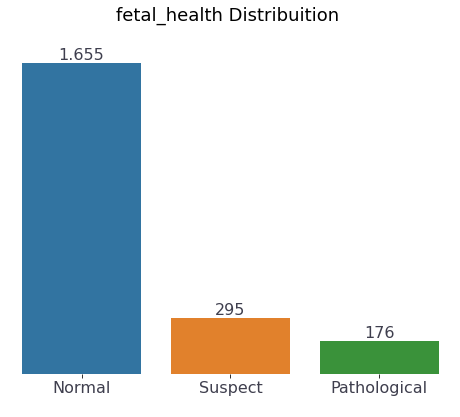

In [ ]:
# fetal_health distribuition

f, ax = plt.subplots(figsize=(8,6))

sns.countplot(x = 'fetal_health', data=df, ax=ax);

plt.title('fetal_health Distribuition \n', fontsize=18)
ax.set_xticklabels(['Normal', 'Suspect', 'Pathological'], fontsize=16, color='#3f3f4e')
ax.set_frame_on(False)
ax.get_yaxis().set_visible(False)
ax.set_xlabel(' ')

# Data Visualization
for hist in ax.patches:
  ax.text(hist.get_x() + hist.get_width() / 2,
          hist.get_height() + 20,
          '{:,}'.format(int(hist.get_height())).replace(',','.'),
          ha = 'center',
          fontsize=16 , color='#3f3f4e')


plt.show()

By viewing the count of `fetal_health` we can see a clear **imbalance**. That is, we have much more data from healthy patients that suspect or pathological ones.

#**Data handling**

To facilitate data handling, a copy of the dataframe (`df1`) will be created with the unification of `fetal_health`values as binary: 0 for healthy or suspicious and 1 for pathological

--------



In [ ]:
# Copy and binarization
df1 = df.copy()
df1['fetal_health'] = df1['fetal_health'] > 2

# LabelEncoder
le = LabelEncoder()
df1['fetal_health'] = le.fit_transform(df1['fetal_health'])

In [ ]:
# Value counts of 'fetal_health' in df1
df1['fetal_health'].value_counts()

0    1950
1     176
Name: fetal_health, dtype: int64

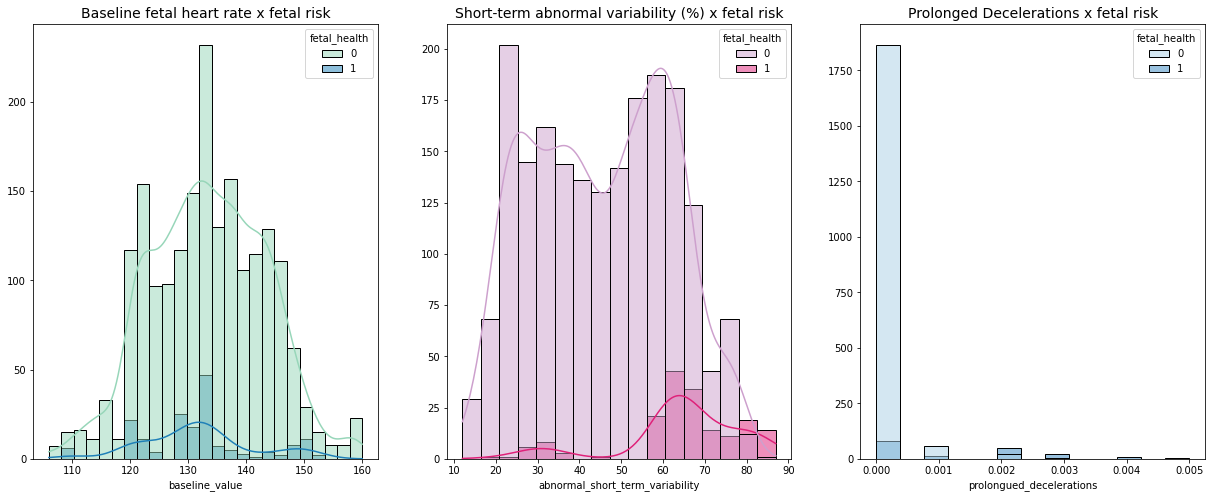

In [ ]:
# Histograms of the main features
f, axs = plt.subplots(1,3, figsize=(21,8))

sns.histplot(x= 'baseline_value', hue='fetal_health', data=df1, palette='YlGnBu', ax=axs[0], kde=True)
axs[0].set_title('Baseline fetal heart rate x fetal risk', fontsize=14)
axs[0].set_ylabel('')

sns.histplot(x= 'abnormal_short_term_variability', hue='fetal_health', data=df1, palette='PuRd', ax=axs[1], kde=True)
axs[1].set_title('Short-term abnormal variability (%) x fetal risk', fontsize=14)
axs[1].set_ylabel('')

sns.histplot(x= 'prolongued_decelerations', hue='fetal_health', data=df1, palette='Blues', ax=axs[2])
axs[2].set_title('Prolonged Decelerations x fetal risk', fontsize=14)
axs[2].set_ylabel('')

plt.show();

* We can observe fetuses in pathologic zones in base fetal heart rate values at the following bpm:110, above 120, and especially between 127-155. 

> It is necessary to emphasize that these parameters alone do not necessarily imply pathological conditions, as seen in healthy fetuses with FHR above 120 bpm onwards.

* Above 55% ondwards of the time with abnormal short-term variability already significantly increases the risk of pathological fetus. Risk is also found, but to a lesser extent between 25-40%.

* **Prolonged decelerations at any level seem to indicate pathological signs.**

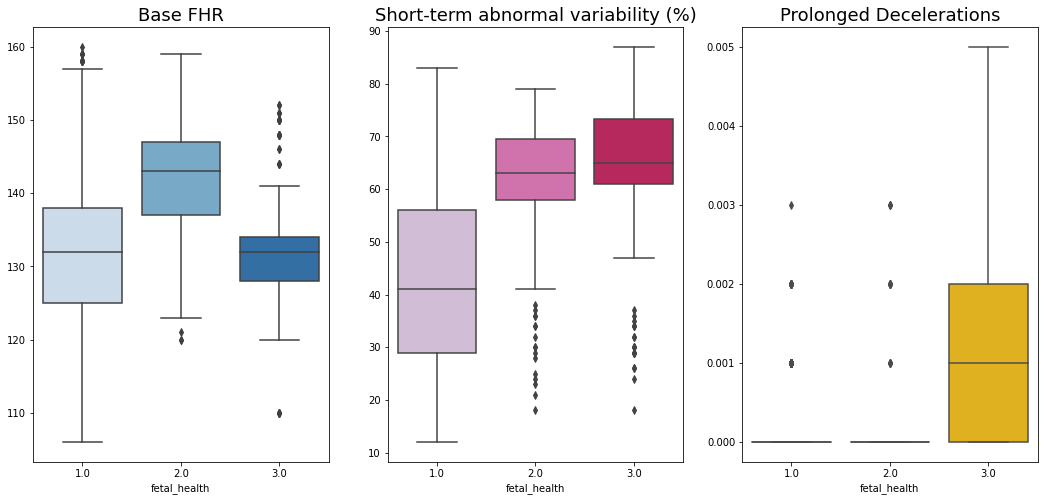

In [ ]:
f, axs = plt.subplots(1,3, figsize=(18,8))

sns.boxplot(y= 'baseline_value', x='fetal_health', data=df, palette='Blues', ax=axs[0])
axs[0].set_title('Base FHR', fontsize=18)
axs[0].set_ylabel('')

sns.boxplot(y= 'abnormal_short_term_variability', x='fetal_health', data=df, palette='PuRd', ax=axs[1])
axs[1].set_title('Short-term abnormal variability (%)', fontsize=18)
axs[1].set_ylabel('')

sns.boxplot(y= 'prolongued_decelerations', x='fetal_health', data=df, palette='autumn', ax=axs[2])
axs[2].set_title('Prolonged Decelerations', fontsize=18)
axs[2].set_ylabel('')

plt.show();

The base FHR does not indicate much information, as the normal class seems to span the suspicious and pathological classes.

The short-term abnormal variability seems to indicate more information. The vast majority of the suspicious and/or pathological classes are in a range of 55% forward, considering the interquartile range (IQR) of each class

The prolonged decelerations clearly point out that the pathological class is the predominant one with values ranging from 0.001 to 0.005 while the other two classes are zeroed (with the exception of outliers).

We can see several outliers in these graphs. We must remember that not all fetuses that have some kind of alteration are necessarily pathological. For example, perhaps the mother has taken medication that caused sedation and thus temporarily decreased the stimulation of the fetus.

However, when several factors, such as `abnormal_short_term_variability` and `prolongued_decelerations` add up, the probability of pathologic risk tends to increase.

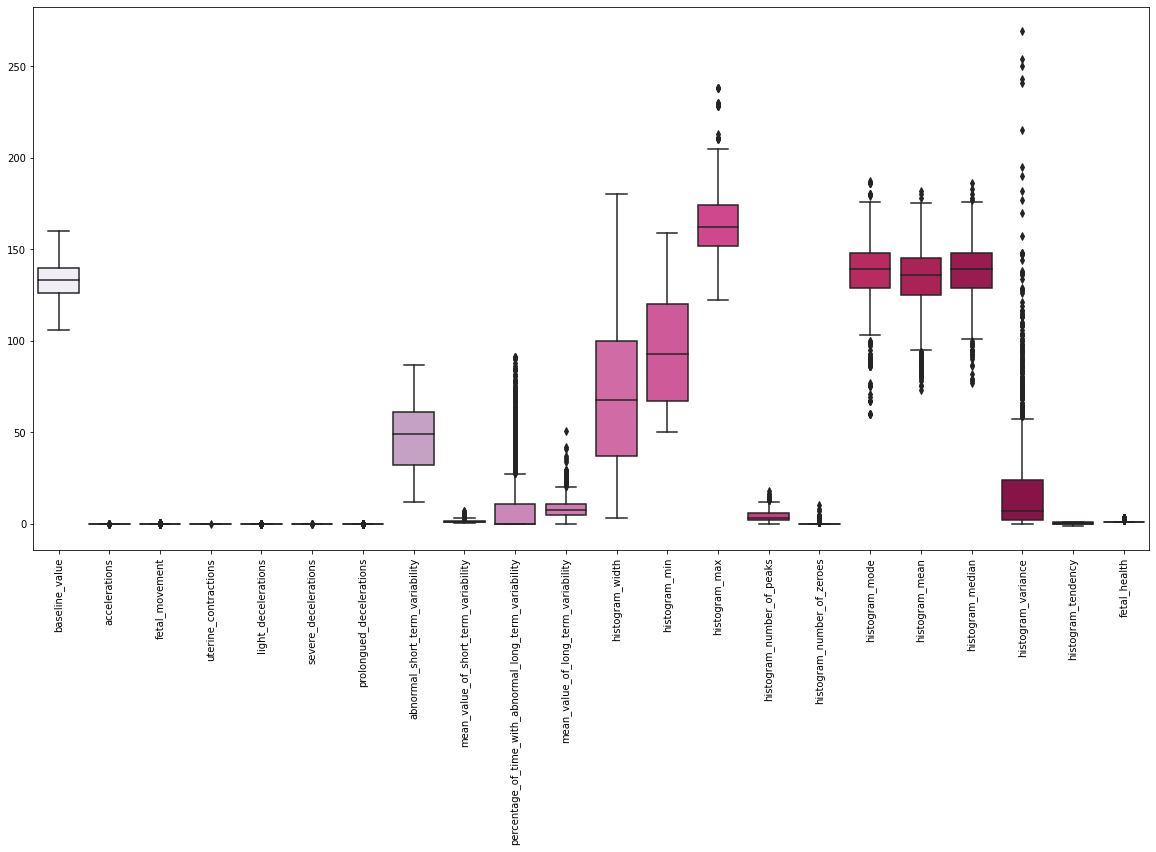

In [ ]:
# Boxplot - all features
plt.figure(figsize=(20,10))
sns.boxplot(data = df, palette = 'PuRd')
plt.xticks(rotation=90)
plt.show()

The box plot of all features indicates very different scales, and thus, requiring standardization of the data. Also, there are outliers in many features, however we should understand that this is expected, because even if the test is altered, further investigations are needed, such as the patient's clinic and more complex test.

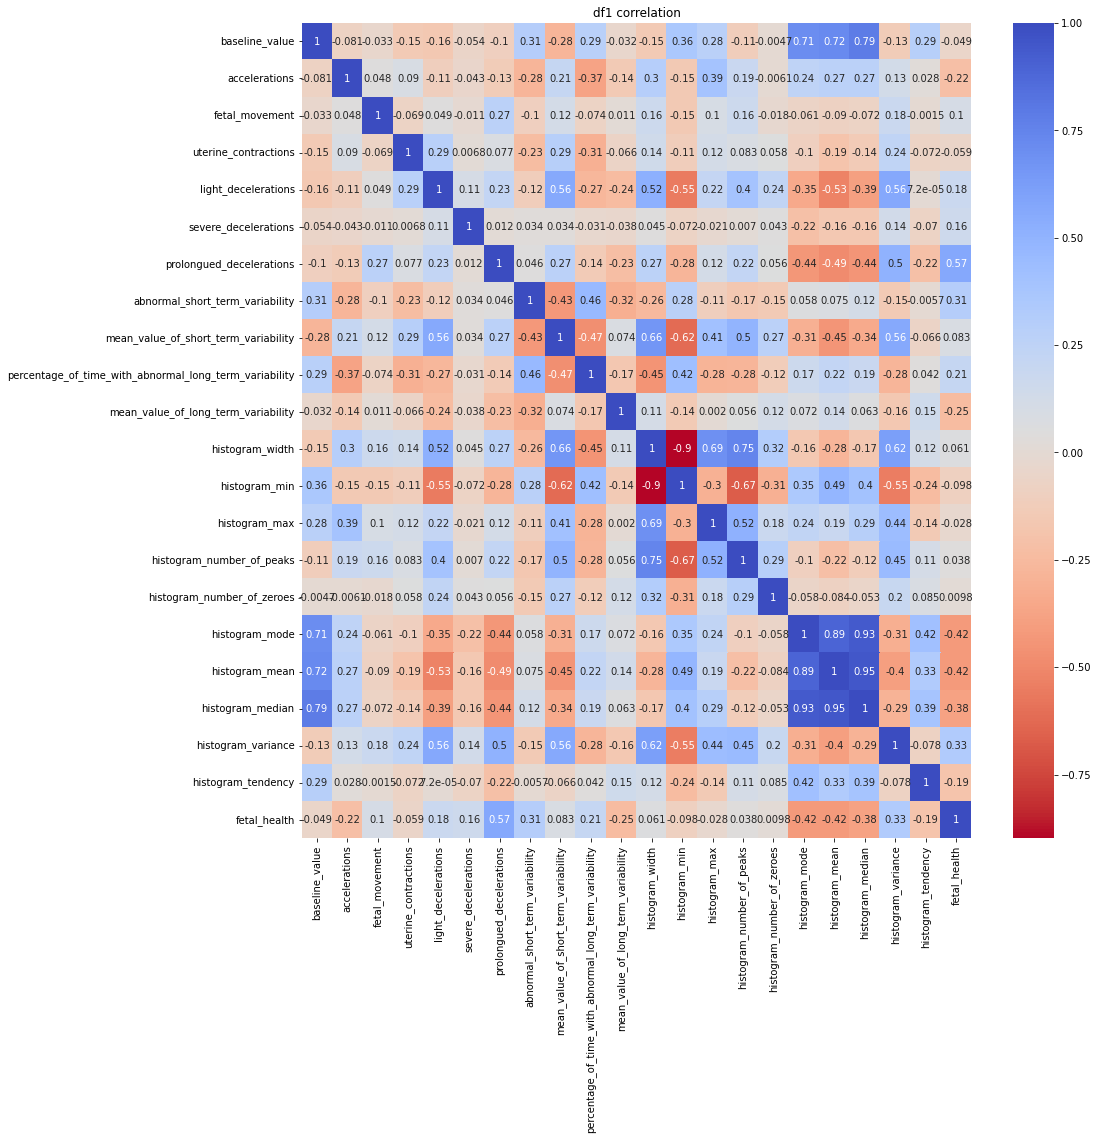

In [ ]:
# df1 correlation
corr = df1.corr()

f = plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap = 'coolwarm_r', annot=True)
plt.title('df1 correlation', fontsize=16)
plt.show()

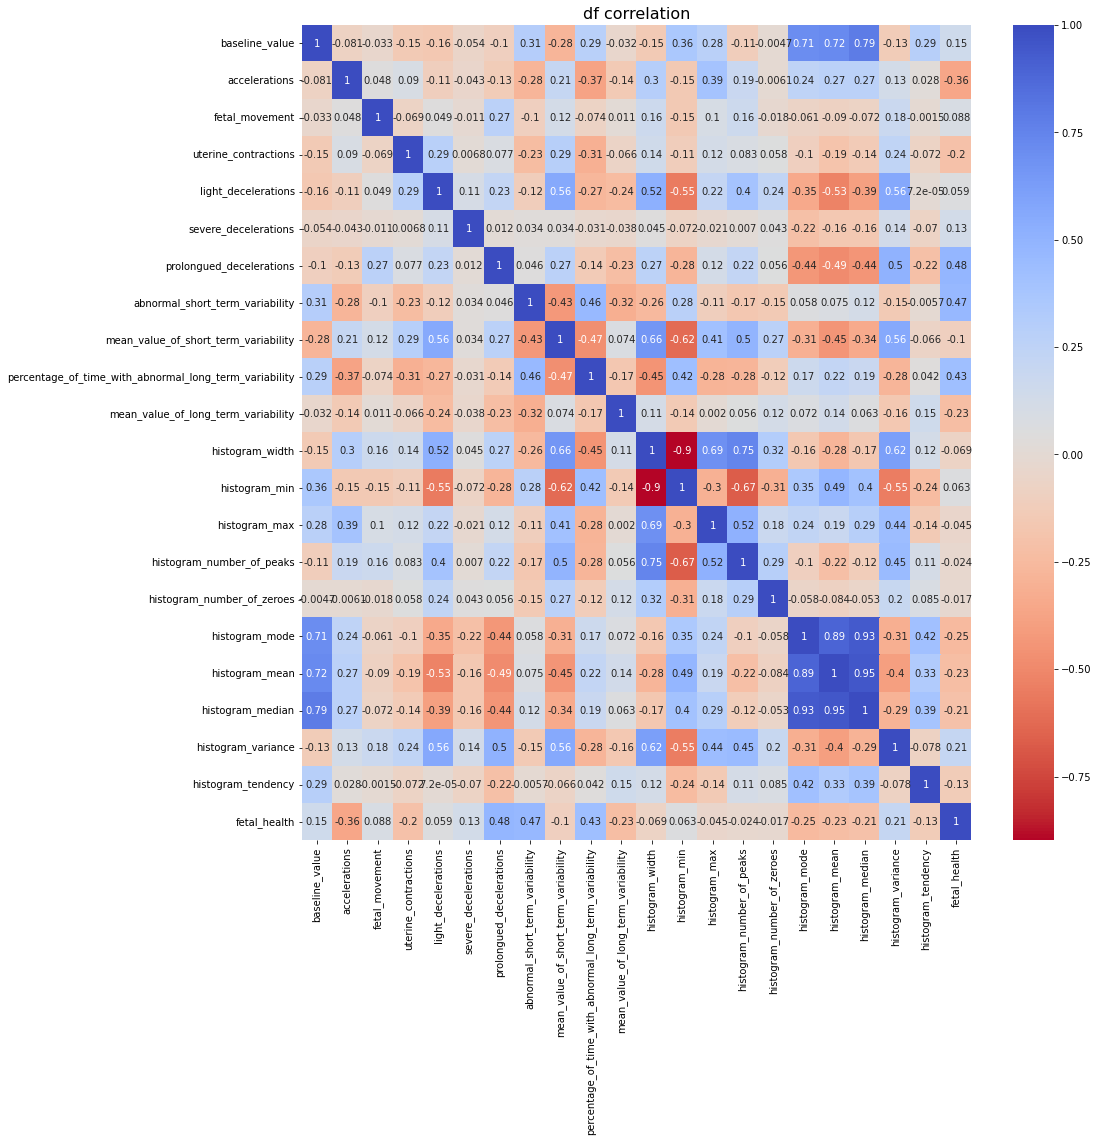

In [ ]:
# df correlation
corr = df.corr()

f = plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap = 'coolwarm_r', annot=True)
plt.title('df correlation', fontsize=16)
plt.show()

There is a higher correlation with fetal_health the following features:

Possitive correlation:

* `prolongued_decelerations`       
* `abnormal_short_term_variability`         

Negative correlation:

* `accelerations`   

In`df1`, we have similar results, in addition to greater negative adaptability of the features `histogram_mode` e `histogram_mean`.


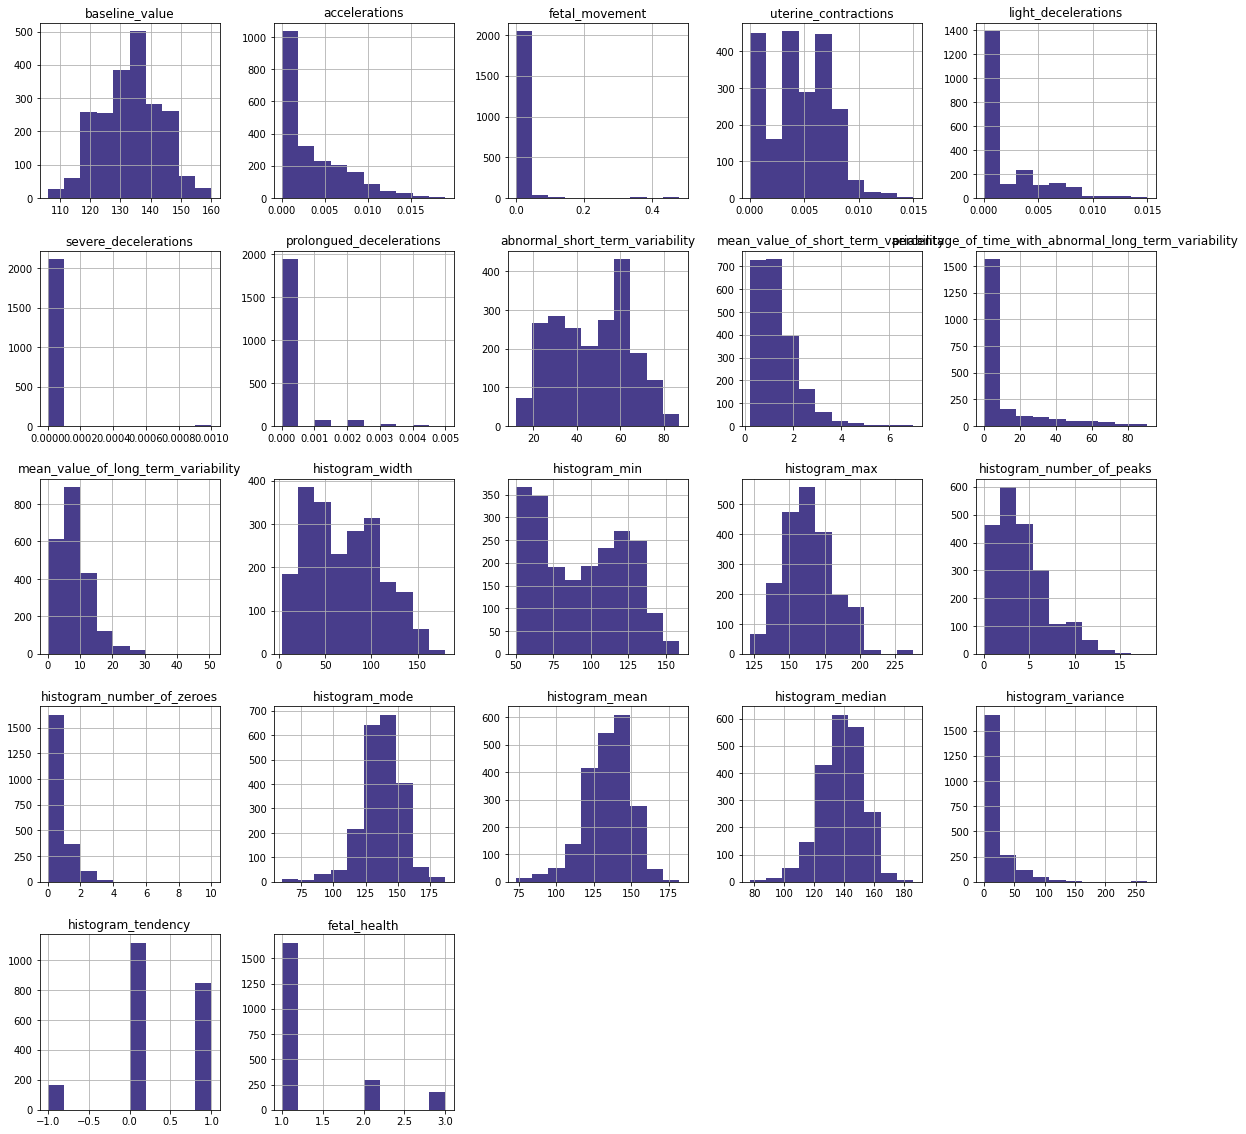

In [ ]:
df.hist(figsize=(20,20), color = "#483D8B");

Most features have a skewed distributions (e.g., `histogram_variance`, `fetal_movement`, etc.). To solve this, we can use a simple standardization.

# **Machine Learning**

For Multiclass datasets it is usually more useful to use the averages of the classification metrics. For example, instead of analyzing only the F1 score metric in isolation, we can measure the `f1_macro` - the arithmetic average, or `f1_weighted` - the weighted average considering the classes. In this analysis, we will focus on the `f1_weighted` since we have an unbalanced dataset, and the weighted average of the metrics. Besides the classic metrics (precision, recall, f1_score, roc_auc) we will also use `log_loss` and `matthews_corrcoef`.

The `log_loss` evaluates how closely the predicted value matches the true value.. The higher the divergence, the higher the `log_loss`. So, the smaller the value, the more accurate the model is.

The `matthews_corrcoef` is Matthews Correlation Coefficient. This metric measures the degree of harmony among all posible outcomes (true and false positives and negatives). It is particularly useful in binary or multiclass datasets and for comparing different models. The closed it is to 1, the better.

In this step we standardize the data with `StandardScaler` to be in similar scales, we balance it with `RandomUnderSampler` and we split the dataset into train x test. To ensure that the splits will be proportional and random, `stratify` and `shuffle` will be used respectively.


In [ ]:
# features x target Split
X = df.drop(['fetal_health'], axis=1)
y = df['fetal_health']

# Standardization with `StandardScaler` 
col_names = list(X.columns)

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=col_names)

# train x test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, random_state=42)

In [ ]:
# Balancing with RandomUnderSampler
rus = RandomUnderSampler()
X_res, y_res = rus.fit_resample(X_train, y_train)

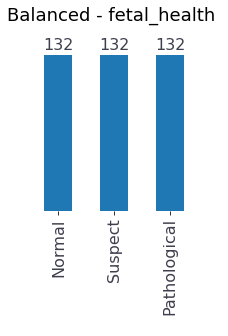

In [ ]:
# Barplot - balanced target 
f, ax = plt.subplots(figsize=(3,3))

y_res.value_counts().plot(kind='bar', ax=ax)
plt.title('Balanced - fetal_health \n', fontsize=18)
ax.set_xticklabels(['Normal', 'Suspect', 'Pathological'], fontsize=16, color='#3f3f4e')
ax.set_frame_on(False)
ax.get_yaxis().set_visible(False)
ax.set_xlabel(' ')

for hist in ax.patches:
  ax.text(hist.get_x() + hist.get_width() / 2,
          hist.get_height() + 5,
          '{:,}'.format(int(hist.get_height())).replace(',','.'),
          ha = 'center',
          fontsize=16 , color='#3f3f4e')


plt.show()

Here we can confirm that the classes are balanced!

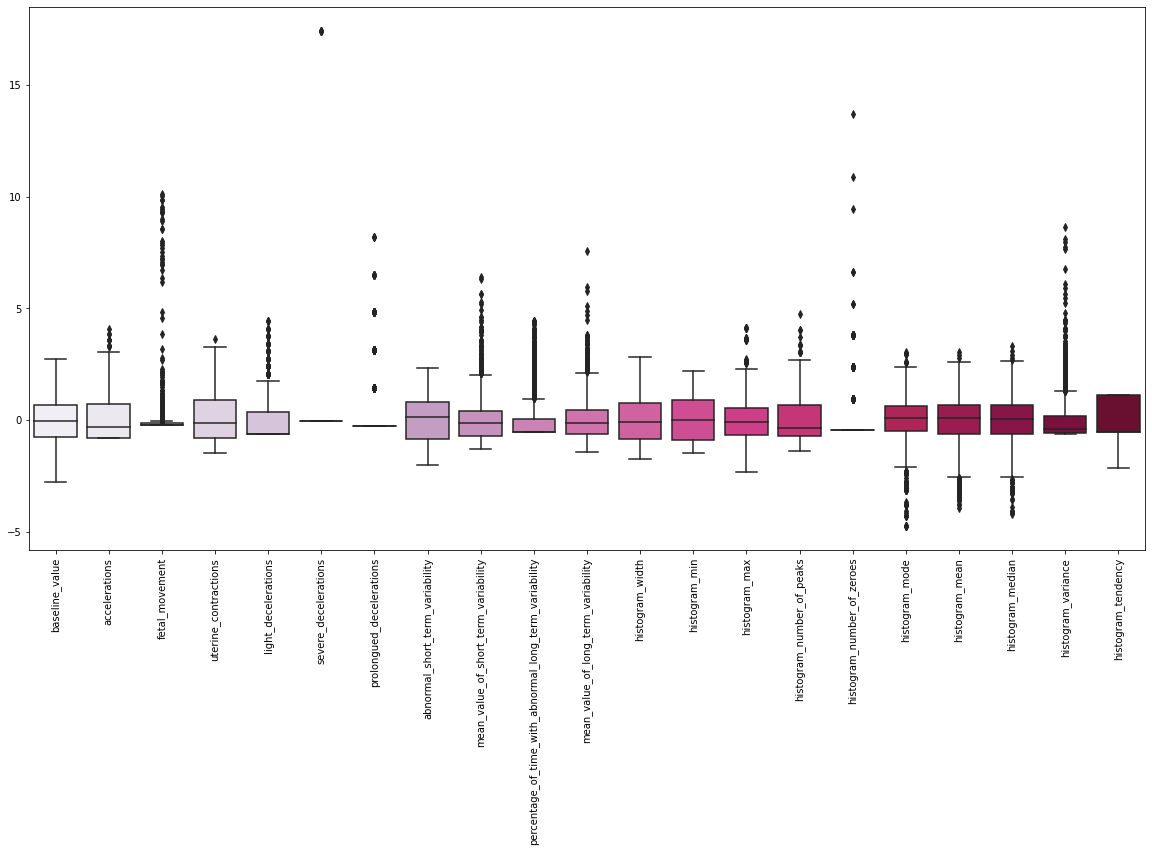

In [ ]:
# # Boxplot - all features standardized
plt.figure(figsize=(20,10))
sns.boxplot(data = X, palette = 'PuRd')
plt.xticks(rotation=90)
plt.show()

From this moment on, the data are balanced and standardized.

In [ ]:
# Classifiers
classifiers = {
    'LogisticRegression':  LogisticRegression(),
    'XGBoost': XGBClassifier(),
    'KNN': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    'SVC': SVC(),
}

In [ ]:
print('Cross-Validation original dataset:')
for key, classifier in classifiers.items():
  classifier.fit(X_train, y_train)
  training_score = cross_val_score(classifier, X_train, y_train, scoring='f1_weighted')
  print('Classificador: ', classifier.__class__.__name__, '-', round(training_score.mean(), 2) * 100, '% f1_weighted')

print('\n')

print('Cross-Validation balanced dataset:')
for key, classifier in classifiers.items():
  classifier.fit(X_res, y_res)
  training_score = cross_val_score(classifier, X_res, y_res, scoring='f1_weighted')
  print('Classificador: ', classifier.__class__.__name__, '-', round(training_score.mean(), 2) * 100, '% f1_weighted')

Cross-Validation dataset original:
Classificador:  LogisticRegression - 90.0 % f1_weighted
Classificador:  XGBClassifier - 95.0 % f1_weighted
Classificador:  KNeighborsClassifier - 89.0 % f1_weighted
Classificador:  GaussianNB - 84.0 % f1_weighted
Classificador:  SVC - 91.0 % f1_weighted


Cross-Validation dataset rebalanceado:
Classificador:  LogisticRegression - 84.0 % f1_weighted
Classificador:  XGBClassifier - 90.0 % f1_weighted
Classificador:  KNeighborsClassifier - 82.0 % f1_weighted
Classificador:  GaussianNB - 76.0 % f1_weighted
Classificador:  SVC - 85.0 % f1_weighted


It is noticeable that we had a lower F1 score of the cross validation score after balancing, which indicates a probable overfitting before balancing, moreover, probably other metrics (like recall) may have improved. 


The best Cross-Validation scores after balancing were from XGBoost, KNeighborsClassifier and SVC. In this paper we will use the first two.

## XGBoost Classifier

              precision    recall  f1-score   support

         1.0       0.97      0.89      0.93       414
         2.0       0.62      0.82      0.71        74
         3.0       0.79      0.95      0.87        44

    accuracy                           0.89       532
   macro avg       0.79      0.89      0.83       532
weighted avg       0.91      0.89      0.89       532



Matthew’s correlation coefficient: 0.734
Log loss: 0.294
AUC: 0.971




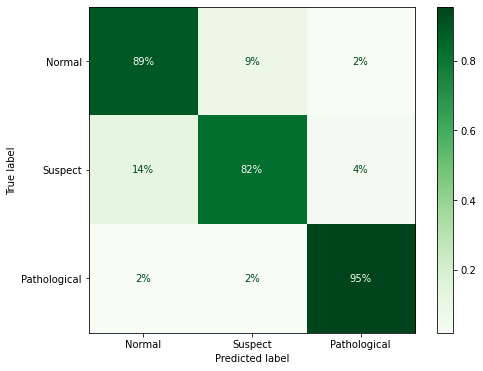

In [ ]:
# XGBClassifier
xgb = XGBClassifier(random_state=42)

xgb.fit(X_res, y_res)
xgb_pred = xgb.predict(X_test)

xgb_proba = xgb.predict_proba(X_test)

# Classification Report
print(classification_report(y_test, xgb_pred))
print('\n')

# ConfusionMatrix
f, ax = plt.subplots(figsize=(8,6))
ConfusionMatrixDisplay.from_predictions(y_test, xgb_pred, cmap = 'Greens',
                                        display_labels=('Normal', 'Suspect', 'Pathological'),
                                        ax=ax, normalize ='true', values_format= '.0%');
# Matthews_corrcoef
print('Matthew’s correlation coefficient:', round(matthews_corrcoef(y_test, xgb_pred), 3))

# Log loss (lower is better)
print('Log loss:', round(log_loss(y_test, xgb_proba), 3))

# AUC
knn_auc = roc_auc_score(y_test, xgb_proba, average="weighted", multi_class="ovr")
print(f'AUC: {knn_auc:.3f}')
print('\n')

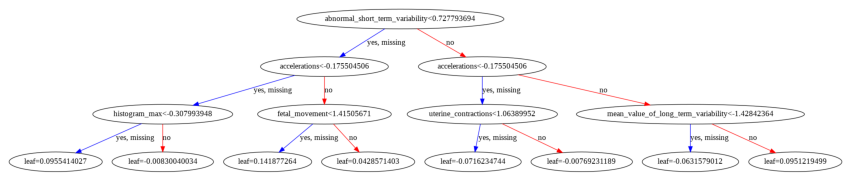

In [ ]:
# Decision tree plot
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

fig, ax = plt.subplots(figsize = (15,15))
plot_tree(xgb, ax=ax)
plt.show()

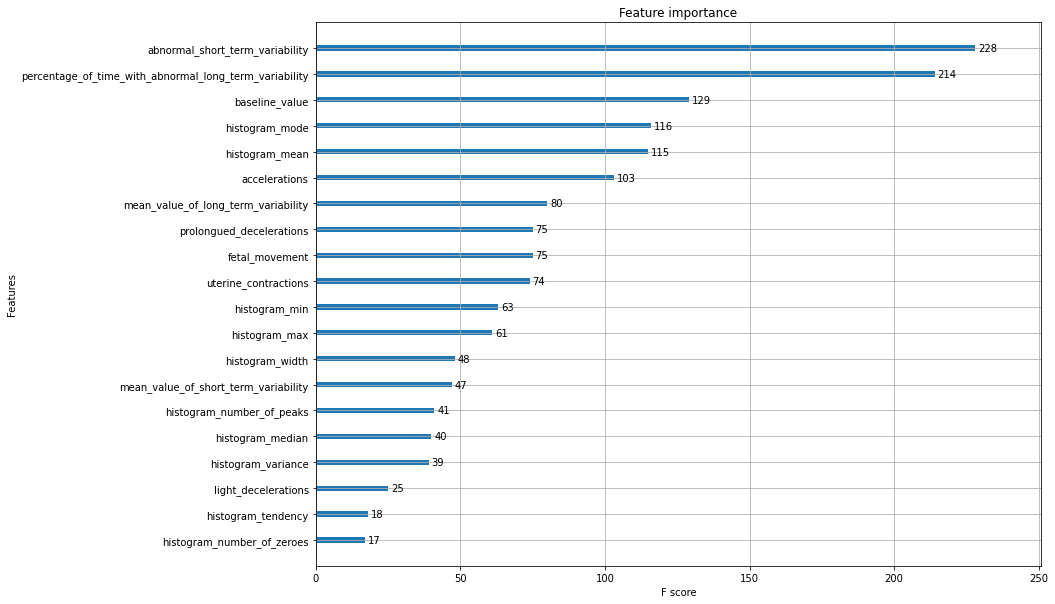

In [ ]:
# Feature importance
fig, ax = plt.subplots(figsize = (13,10))
plot_importance(xgb, ax=ax)
plt.show();

The construction of the XGBoost led to great result, with a 95% recall and 79% accuracy for the pathological class. That is, for every 100 pathological fetuses, 95 are detected, and of this result, 79 are actually pathological. The weighted average f1 score was also great: 0.89

The most important features were, in descending order:

* 1º percentage_of_time_with_abnormal_long_term_variability
* 2º abnormal_short_term_variability
* 3º histogram_mean
 
XGBoost metrics: 
- Matthew’s correlation coefficient: 0.734
- Log loss: 0.294
- AUC: 0.971

## KNN Classifier

The K-nearest neighbors Classifier is a classifier that relies on the distance of the neighbor numbers from the feature values to classify the target. Since it suffers from large scale interference, the data were previously standardized to optime the result. To find the optimal number of `n_neighbors`, GridSearchCV will be used.

In [ ]:
# KNeighborsClassifier GridSearchCV
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': [1,2,3,5,6,8],
              'weights': ('uniform', 'distance')}

knn_grid_search = GridSearchCV(knn, knn_params, scoring="f1_weighted", n_jobs=-1)

knn_grid_result = knn_grid_search.fit(X_res, y_res)

# see results
print(f" {knn_grid_search.best_params_}")

 {'n_neighbors': 8, 'weights': 'distance'}


              precision    recall  f1-score   support

         1.0       0.99      0.81      0.89       414
         2.0       0.44      0.86      0.58        74
         3.0       0.69      0.75      0.72        44

    accuracy                           0.81       532
   macro avg       0.71      0.81      0.73       532
weighted avg       0.89      0.81      0.83       532



Matthew’s correlation coefficient: 0.626
Log loss: 0.996
AUC: 0.948




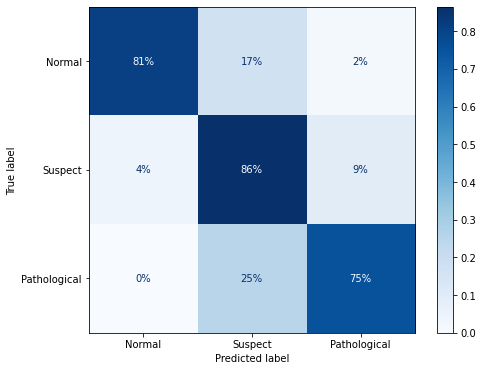

In [ ]:
# # KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8, weights='distance')
knn.fit(X_res, y_res)
knn_pred = knn.predict(X_test)
knn_proba =knn.predict_proba(X_test)

# Classification Report
print(classification_report(y_test, knn_pred))
print('\n')

# ConfusionMatrix
f, ax = plt.subplots(figsize=(8,6))
ConfusionMatrixDisplay.from_predictions(y_test, knn_pred, cmap = 'Blues',
                                        display_labels=('Normal', 'Suspect', 'Pathological'),
                                        ax=ax, normalize ='true', values_format= '.0%');

# Matthews_corrcoef
print('Matthew’s correlation coefficient:', round(matthews_corrcoef(y_test, knn_pred), 3))

# Log loss (lower is better)
print('Log loss:', round(log_loss(y_test, knn_proba), 3))

# AUC
knn_auc = roc_auc_score(y_test, knn_proba, average="weighted", multi_class="ovr")
print(f'AUC: {knn_auc:.3f}')
print('\n')

(O GridSearchCV may show different results due to the nature of the classifier, such as a different value for `n_neighbors`)
The KNN model achieved a recall of 75% and an accuracy of 69% for the pathological class. The weighted f1 score was 0.83. 

KNN metrics:

- Matthew’s correlation coefficient: 0.626
- Log loss: 0.996
- AUC: 0.948

Despite having good numbers, XGBoost performed better than KNN.

<p align=center>
<img src="https://raw.githubusercontent.com/Diego875621/Data_Science/main/Fetal%20Health%20Classification/child_exam.jpg" width="50%"></p>
<p align=center>Fonte: Freepik

# Conclusion

The cardiotocography test is based on the measurement of the fetal heart rate, uterine activity, and fetal movement perception, which together indicate how the fetus' heart health is wheter it is at risk of developing hypoxia, and is most often used in high-risk pregnant women. The parameters with the highest indication of pathology are base fetal heart rate (base FHR) and decelerations levels.

`fetal_health` is the target variable. All features are in numerical formats and there are no missing values. The histogram plots show several features with skewed distributions. The classes are unbalanced. So it was necessary to use standardization and balancing the dataset. The main features with correlation with `fetal_health` were (+):`prolonged_decelerations` and `abnormal_short_term_variability` and (-) `accelerations`.

Plots of `abnormal_short_term_variability` indicate that above 55% onwards of the time with abnormal short-term variability already significantly increases the risk of pathological fetus. Plots of `prolonged_decelerations`  point out that the pathological class is the predominant one with values ranging from 0.001 to 0.005 while the other two classes are zeroed (with the exception of outliers).

Among the analyzed classifiers, XGBoost seems to perform better, obtaining great Recall metrics, F1 score and little Log Loss. The classifier models developed here can be put together in information systems so that together with medical team, they can help in screening detecting cases of unhealthy fetuses quickly and thus prevent health problems for the mother and the fetus. In this way, artificial intelligence can help health professionals make better decisions based on the results predicted by machine learning models.

It should be kept in mind that the results should be analyzed holistically. For example, Mancuso and other researchers (2008) looked at the level of anxiety before and after the CTG exam and noticed that before the women were calmer than after the procedure. This should turn on a warning light for biased results. It is also important to point out that the models should be worked out in conjunction with the patient's clinic and that other tests should be done, such as Doppler ultrasound, to confirm wheter there are indeed problems with fetal health of the fetus and thus to determine the diagnosis. In the other words, the available tools must be worked in a a complementary and correlated way.



**References:**

GRIVELL, Rosalie M. et al. Antenatal cardiotocography for fetal assessment. Cochrane database of systematic reviews, n. 9, 2015.

MANCUSO, Alfredo et al. Effects of antepartum electronic fetal monitoring on maternal emotional state. Acta Obstetricia et Gynecologica Scandinavica, v. 87, n. 2, p. 184-189, 2008.

**Images source:**

<a href="https://www.freepik.com/free-vector/pregnancy-ultrasound-screening-retro-cartoon-illustration_4186221.htm#query=fetus%20heart&position=1&from_view=search&track=sph">Image by macrovector</a> on Freepik

<a href="https://www.freepik.com/free-vector/baby-birth-concept-illustration_21532448.htm#query=fetus&position=12&from_view=search&track=sph">Image by storyset</a> on Freepik